In [27]:
import numpy as np

import gym
from gym import wrappers
import matplotlib.pyplot as plt

In [28]:
# Simulate Environment

def sim_env(env, Q, n = 1000, max_steps = 100):
    score = []
    for i in range(n):
        s = env.reset()
        d = False
        step_n = 0
        while not d:
            step_n += 1
            a = np.argmax(Q[s,:])
            s1,r,d,_ = env.step(a)
            s = s1
            if step_n >= max_steps:
                break
        score.append(r)
    return(score)

# Frozen Lake 4x4

In [3]:
# create lists to contain total rewards and steps per episode
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped


# set learning parameter
lr_u = np.arange(0.1,1.01,0.1)
scores_all = []

num_ep = 50000

for i in range(len(lr_u)):
    
    Q = np.zeros([env.observation_space.n,env.action_space.n])
#     Q = np.random.random(([env.observation_space.n,env.action_space.n]))
    lr = lr_u[i]
    y = 0.95
    
    rList = []
    sList = []
    
    Q_prev = Q.copy()

    count = 0

    # Epsilon Greed parameter
    eps = 0.5

    # for i in range(num_episodes):
    for ep in range(num_ep):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        sList=[]
        # The Q-Table learning algorithm
        while j < 1000:
            j += 1

            # Choose an action using epsilon greedy
            rand_n = np.random.rand()
            if eps < rand_n:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[s,:])

#             eps = eps*math.exp(-0.00001)
            
#             a = np.random.randint(4)
#             a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
            
            # Cant use best action because it leads no all 0 Q table even with a random Q Table or Q Table with all zeros
#             a = np.argmax(Q[s,:]) 
        
            # Get new state and reward from environment
            s1,r,d,_ = env.step(a)
                    
            Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
            
            s=s1
            rAll += r
            
            if d is True:
                break



    #     rList.append(rAll)

    #     if r==1 :
    #         print(sList)
        count += 1
    #     print(count,j,rAll)
    #     print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(i, j,rAll ,np.mean(rList)))


    print ("Final Q-Table Values")
    print ("          left          down          right          up")
    print (Q)
    print(ep)
    print(lr_u[i])
    if lr_u[i] == 0.1:
        Q_f = Q
    score = sim_env(env,Q,n=1000)
    scores_all.append(np.mean(score))

KeyboardInterrupt: 

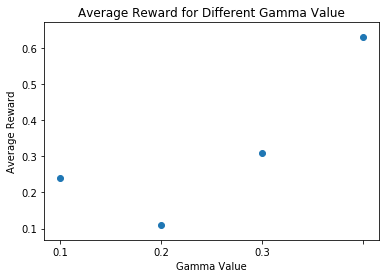

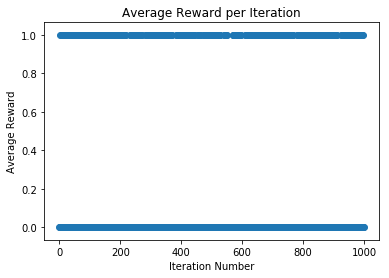

In [22]:
x_t = np.round(lr_u,1)
plt.scatter(np.arange(0,len(scores_all),1),scores_all[0:])
plt.xticks(np.arange(0,len(scores_all),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

score = sim_env(env,Q_f,n=1000)
plt.scatter(np.arange(0,len(score),1),score)
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()

In [17]:
# create lists to contain total rewards and steps per episode
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped
print(env)

# set learning parameter
lr_u = np.arange(0.1,0.31,0.1)
y_u = [0.7, 0.8, 0.9, 0.99] 

num_ep = 10000
scores_m = np.zeros((12,num_ep))
score_per_ep = []
count_all = 0

for i in range(len(lr_u)):
    
    scores_all = []
    
    for l in range(len(y_u)):
        
        Q = np.zeros([env.observation_space.n,env.action_space.n])
    #     Q = np.random.random(([env.observation_space.n,env.action_space.n]))
        lr = lr_u[i]
        y = y_u[l]

        rList = []
        sList = []

        Q_prev = Q.copy()

        count = 0

        # Epsilon Greed parameter
        eps = 0.5

        # for i in range(num_episodes):
        for ep in range(num_ep):
            # Reset environment and get first new observation
            s = env.reset()
            rAll = 0
            d = False
            j = 0
            sList=[]
            # The Q-Table learning algorithm
            while j < 1000:
                j += 1

                # Choose an action using epsilon greedy
                rand_n = np.random.rand()
                if eps < rand_n:
                    a = np.random.randint(4)
                else:
                    a = np.argmax(Q[s,:])

    #             eps = eps*math.exp(-0.00001)

    #             a = np.random.randint(4)
    #             a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))

                # Cant use best action because it leads no all 0 Q table even with a random Q Table or Q Table with all zeros
    #             a = np.argmax(Q[s,:]) 

                # Get new state and reward from environment
                s1,r,d,_ = env.step(a)

                Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])

                s=s1
                rAll += r

                if d is True:
                    break



        #     rList.append(rAll)

        #     if r==1 :
        #         print(sList)
            count += 1
            score_per_ep.append(np.mean(sim_env(env,Q,n=100)))
            scores_m[count_all,ep] = np.mean(score_per_ep)
        #     print(count,j,rAll)
        #     print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(i, j,rAll ,np.mean(rList)))

        
        score_per_ep = []
        print ("Final Q-Table Values")
        print ("          left          down          right          up")
        if lr_u[i] == 0.1:
            Q_f = Q

        score = sim_env(env,Q,n=100)
        scores_all.append(np.mean(score))
        count_all += 1

<FrozenLakeEnv<FrozenLake-v0>>
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Final Q-Table Values
          left          down          right          up
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8

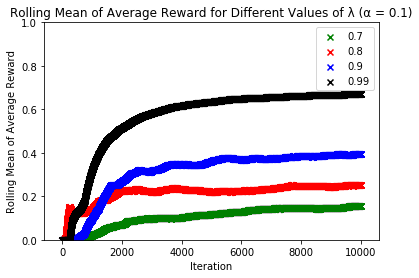

λ


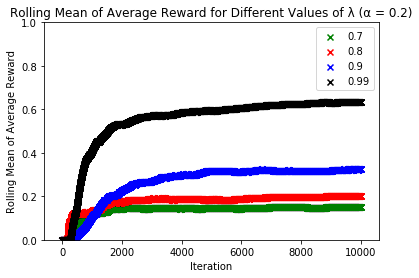

λ


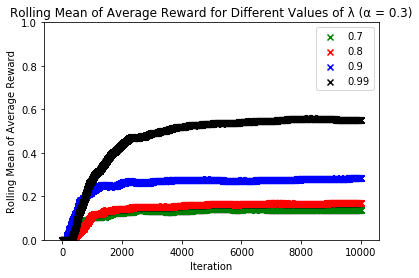

λ


In [21]:
# print(score_per_ep)
# plt.scatter(np.arange(0,len(score_per_ep),1),score_per_ep)
# plt.xlabel('Iteration')
# plt.ylabel('Average Reward')
# plt.ylim([0,1])
# plt.title('Average Reward per Iteration')
# plt.show()
color = ['green', 'red', 'blue', 'black']
count = 0
l = [0.7, 0.8, 0.9, 0.99]
for i in range(0,4):
    plt.scatter(np.arange(0,len(scores_m[i,:]),1),scores_m[i,:],c = color[count],marker = 'x', label = l[count])
    count += 1
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Rolling Mean of Average Reward')
plt.ylim([0,1])
plt.title('Rolling Mean of Average Reward for Different Values of λ (α = 0.1)')
plt.show()
print('λ')

color = ['green', 'red', 'blue', 'black']
l = [0.7, 0.8, 0.9, 0.99]
count = 0
for i in range(4,8):
    plt.scatter(np.arange(0,len(scores_m[i,:]),1),scores_m[i,:],c = color[count],marker = 'x', label = l[count])
    count += 1
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Rolling Mean of Average Reward')
plt.ylim([0,1])
plt.title('Rolling Mean of Average Reward for Different Values of λ (α = 0.2)')
plt.show()
print('λ')

color = ['green', 'red', 'blue', 'black']
l = [0.7, 0.8, 0.9, 0.99]
count = 0
for i in range(8,12):
    plt.scatter(np.arange(0,len(scores_m[i,:]),1),scores_m[i,:],c = color[count],marker = 'x', label = l[count])
    count += 1
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Rolling Mean of Average Reward')
plt.ylim([0,1])
plt.title('Rolling Mean of Average Reward for Different Values of λ (α = 0.3)')
plt.show()
print('λ')

# Frozen Lake 16x16 

In [31]:
# create lists to contain total rewards and steps per episode
env_name = 'FrozenLake16x16-v0'
env = gym.make(env_name)
env = env.unwrapped


# set learning parameter
lr_u = np.arange(0.1,0.2,0.1)
scores_all = []
score_per_ep = []
scores_m = np.zeros((1,num_ep))

num_ep = 10000

for i in range(len(lr_u)):
    
    Q = np.zeros([env.observation_space.n,env.action_space.n])
#     Q = np.random.random(([env.observation_space.n,env.action_space.n]))
    lr = lr_u[i]
    y = 0.95
    
    rList = []
    sList = []
    
    Q_prev = Q.copy()

    count = 0

    # Epsilon Greed parameter
    eps = 0.5

    # for i in range(num_episodes):
    for ep in range(num_ep):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        sList=[]
        # The Q-Table learning algorithm
        while j < 100000:
            j += 1

            # Choose an action using epsilon greedy
            rand_n = np.random.rand()
            if eps < rand_n:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[s,:])

#             eps = eps*math.exp(-0.00001)
            
#             a = np.random.randint(4)
#             a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
            
            # Cant use best action because it leads no all 0 Q table even with a random Q Table or Q Table with all zeros
#             a = np.argmax(Q[s,:]) 
        
            # Get new state and reward from environment
            s1,r,d,_ = env.step(a)
                    
            Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
            
            s=s1
            rAll += r
            
            if d is True:
                break



    #     rList.append(rAll)

    #     if r==1 :
    #         print(sList)
        count += 1
        score_per_ep.append(np.mean(sim_env(env,Q,n=100)))
        scores_m[0,ep] = np.mean(score_per_ep)
    #     print(count,j,rAll)
    #     print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(i, j,rAll ,np.mean(rList)))

        if ep%100 == 0:
            print(ep)
    print ("Final Q-Table Values")
    print ("          left          down          right          up")
    print (Q)
    print(ep)
    print(lr_u[i])
    if lr_u[i] == 0.1:
        Q_f = Q
    score = sim_env(env, Q, n=1000, max_steps = 1000)
    scores_all.append(np.mean(score))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Final Q-Table Values
          left          down          right          up
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
9999
0.1


[0. 0. 0. ... 0. 0. 0.]


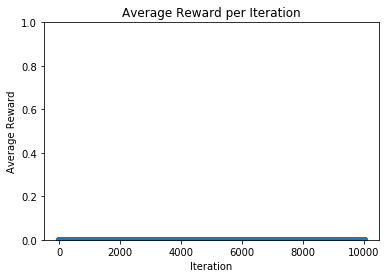

[[0. 0. 0. ... 0. 0. 0.]]


In [34]:
# print(score_per_ep)
plt.scatter(np.arange(0,len(scores_m[0]),1),scores_m)
plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Average Reward per Iteration')
plt.ylim([0,1])
plt.show()
